In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_style("whitegrid")

In [6]:
path = 'C:/Users/vidis/OneDrive/Desktop/Spring23/BachelorProject/'
mses = pd.read_csv(path+'mses.csv')
test = pd.read_csv(path+'test.csv')
fc = pd.read_csv(path+'forecasted.csv')
fc_ub = pd.read_csv(path+'f_upper_bounds.csv')
fc_lb = pd.read_csv(path+'f_lower_bounds.csv')
pval = pd.read_csv(path+'p_value.csv')

In [8]:
for i in [mses, test, fc, fc_ub, fc_lb, pval]:
    print(len(i))

624
14976
14976
14976
14976
624


In [75]:
pf = pd.concat([mses,pval],axis=1)
pf.columns = ['mses','pvals']

In [14]:
df = pd.concat([test,fc,fc_ub,fc_lb],axis=1)
df.columns = ['test','fc','fc_ub','fc_lb']

In [82]:
def plot(df,st,ed):
    fig, ax = plt.subplots(figsize=(15,3))
    
    val = int((ed-st)*0.3)
    
    ax.plot(df['test'][st-val:st],label='',linewidth=1,color='tab:green')
    ax.plot(df['test'][st:ed],label='Actual',linewidth=1,color='tab:green')
    ax.plot(df['fc'][st:ed], label='Forecast',linewidth=1,color='tab:blue')
    ax.plot(df['fc_ub'][st:ed], label='Upper Bound',alpha=0.4,linewidth=0.8,color='tab:pink')
    ax.plot(df['fc_lb'][st:ed], label='Lower Bound',alpha=0.4,linewidth=0.8,color='tab:red')

    x = np.arange(st,ed,1)
    ax.fill_between(x, df['fc_ub'][st:ed], df['fc_lb'][st:ed], alpha=0.1,color='tab:red')

    ax.set_title(f'Production forecast from index {st} to {ed} with 95% confidence intervals')
    ax.set_xlabel('Index')
    ax.set_ylabel('Production KWh')
    ax.legend(bbox_to_anchor=[1.15,1.01])

    plt.show()

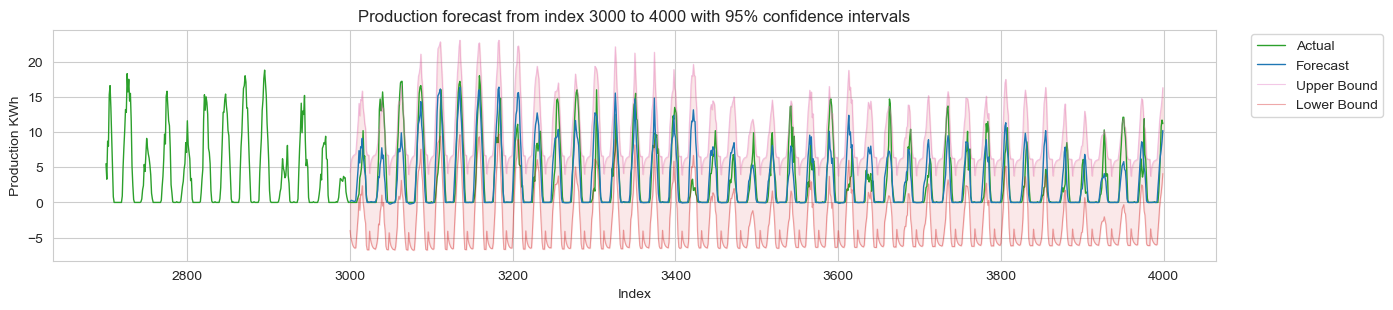

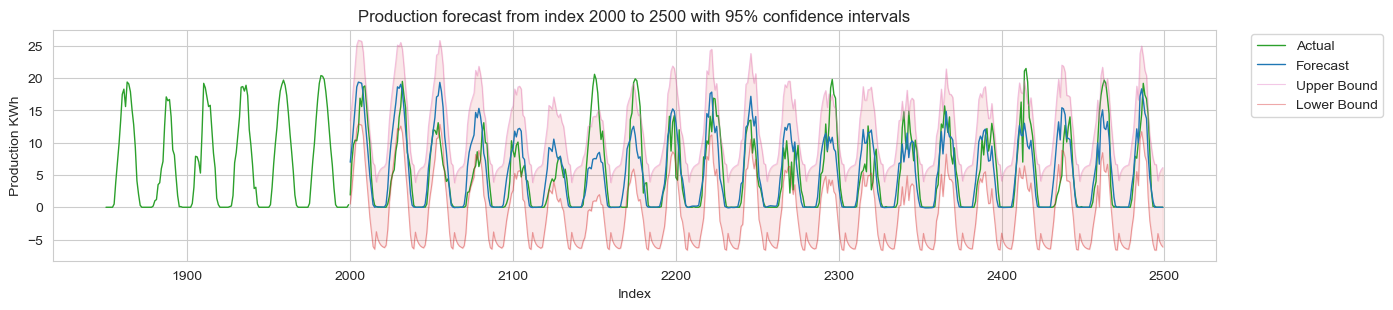

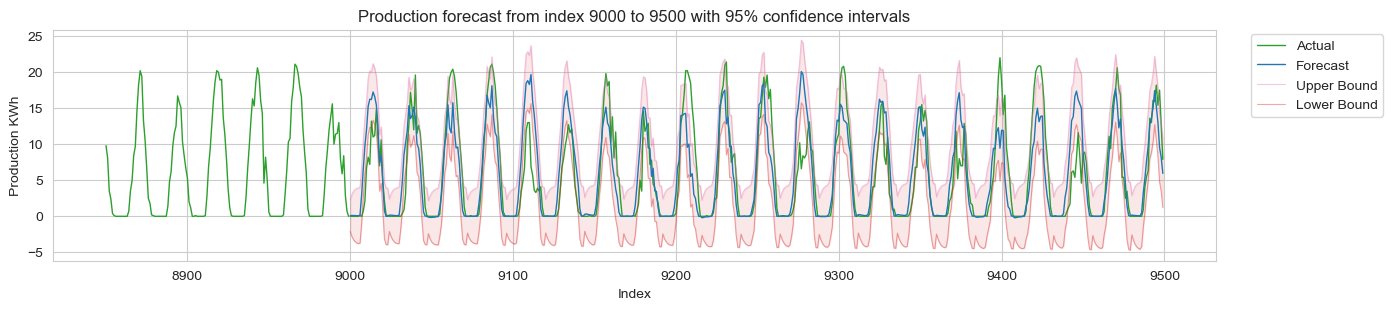

In [83]:
plot(df,3000,4000)
plot(df,2000,2500)
plot(df,9000,9500)

In [72]:
df.to_csv('forecasted_k28.csv')

In [77]:
pf.to_csv('info_k28.csv')